# Credit Risk Modelling

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Exploratory Data Analysis

In [86]:
loan_data = pd.read_csv('./archive/lc_2016_2017.csv')

/Users/abikanna/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [88]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [89]:
print(loan_data.describe().transpose())
print(loan_data.info())

                                count          mean           std  \
id                           759338.0  9.317508e+07  1.536975e+07   
member_id                         0.0           NaN           NaN   
loan_amnt                    759338.0  1.470778e+04  9.215456e+03   
funded_amnt                  759338.0  1.470774e+04  9.215456e+03   
funded_amnt_inv              759338.0  1.470253e+04  9.213004e+03   
int_rate                     759338.0  1.318704e+01  5.054311e+00   
installment                  759338.0  4.425846e+02  2.757396e+02   
annual_inc                   759338.0  7.996778e+04  1.634141e+05   
dti                          758983.0  1.898080e+01  1.336340e+01   
delinq_2yrs                  759338.0  3.577946e-01  9.517625e-01   
inq_last_6mths               759337.0  5.382985e-01  8.383059e-01   
mths_since_last_delinq       396633.0  3.347678e+01  2.188813e+01   
mths_since_last_record       141179.0  6.883510e+01  2.502900e+01   
open_acc                     75933

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

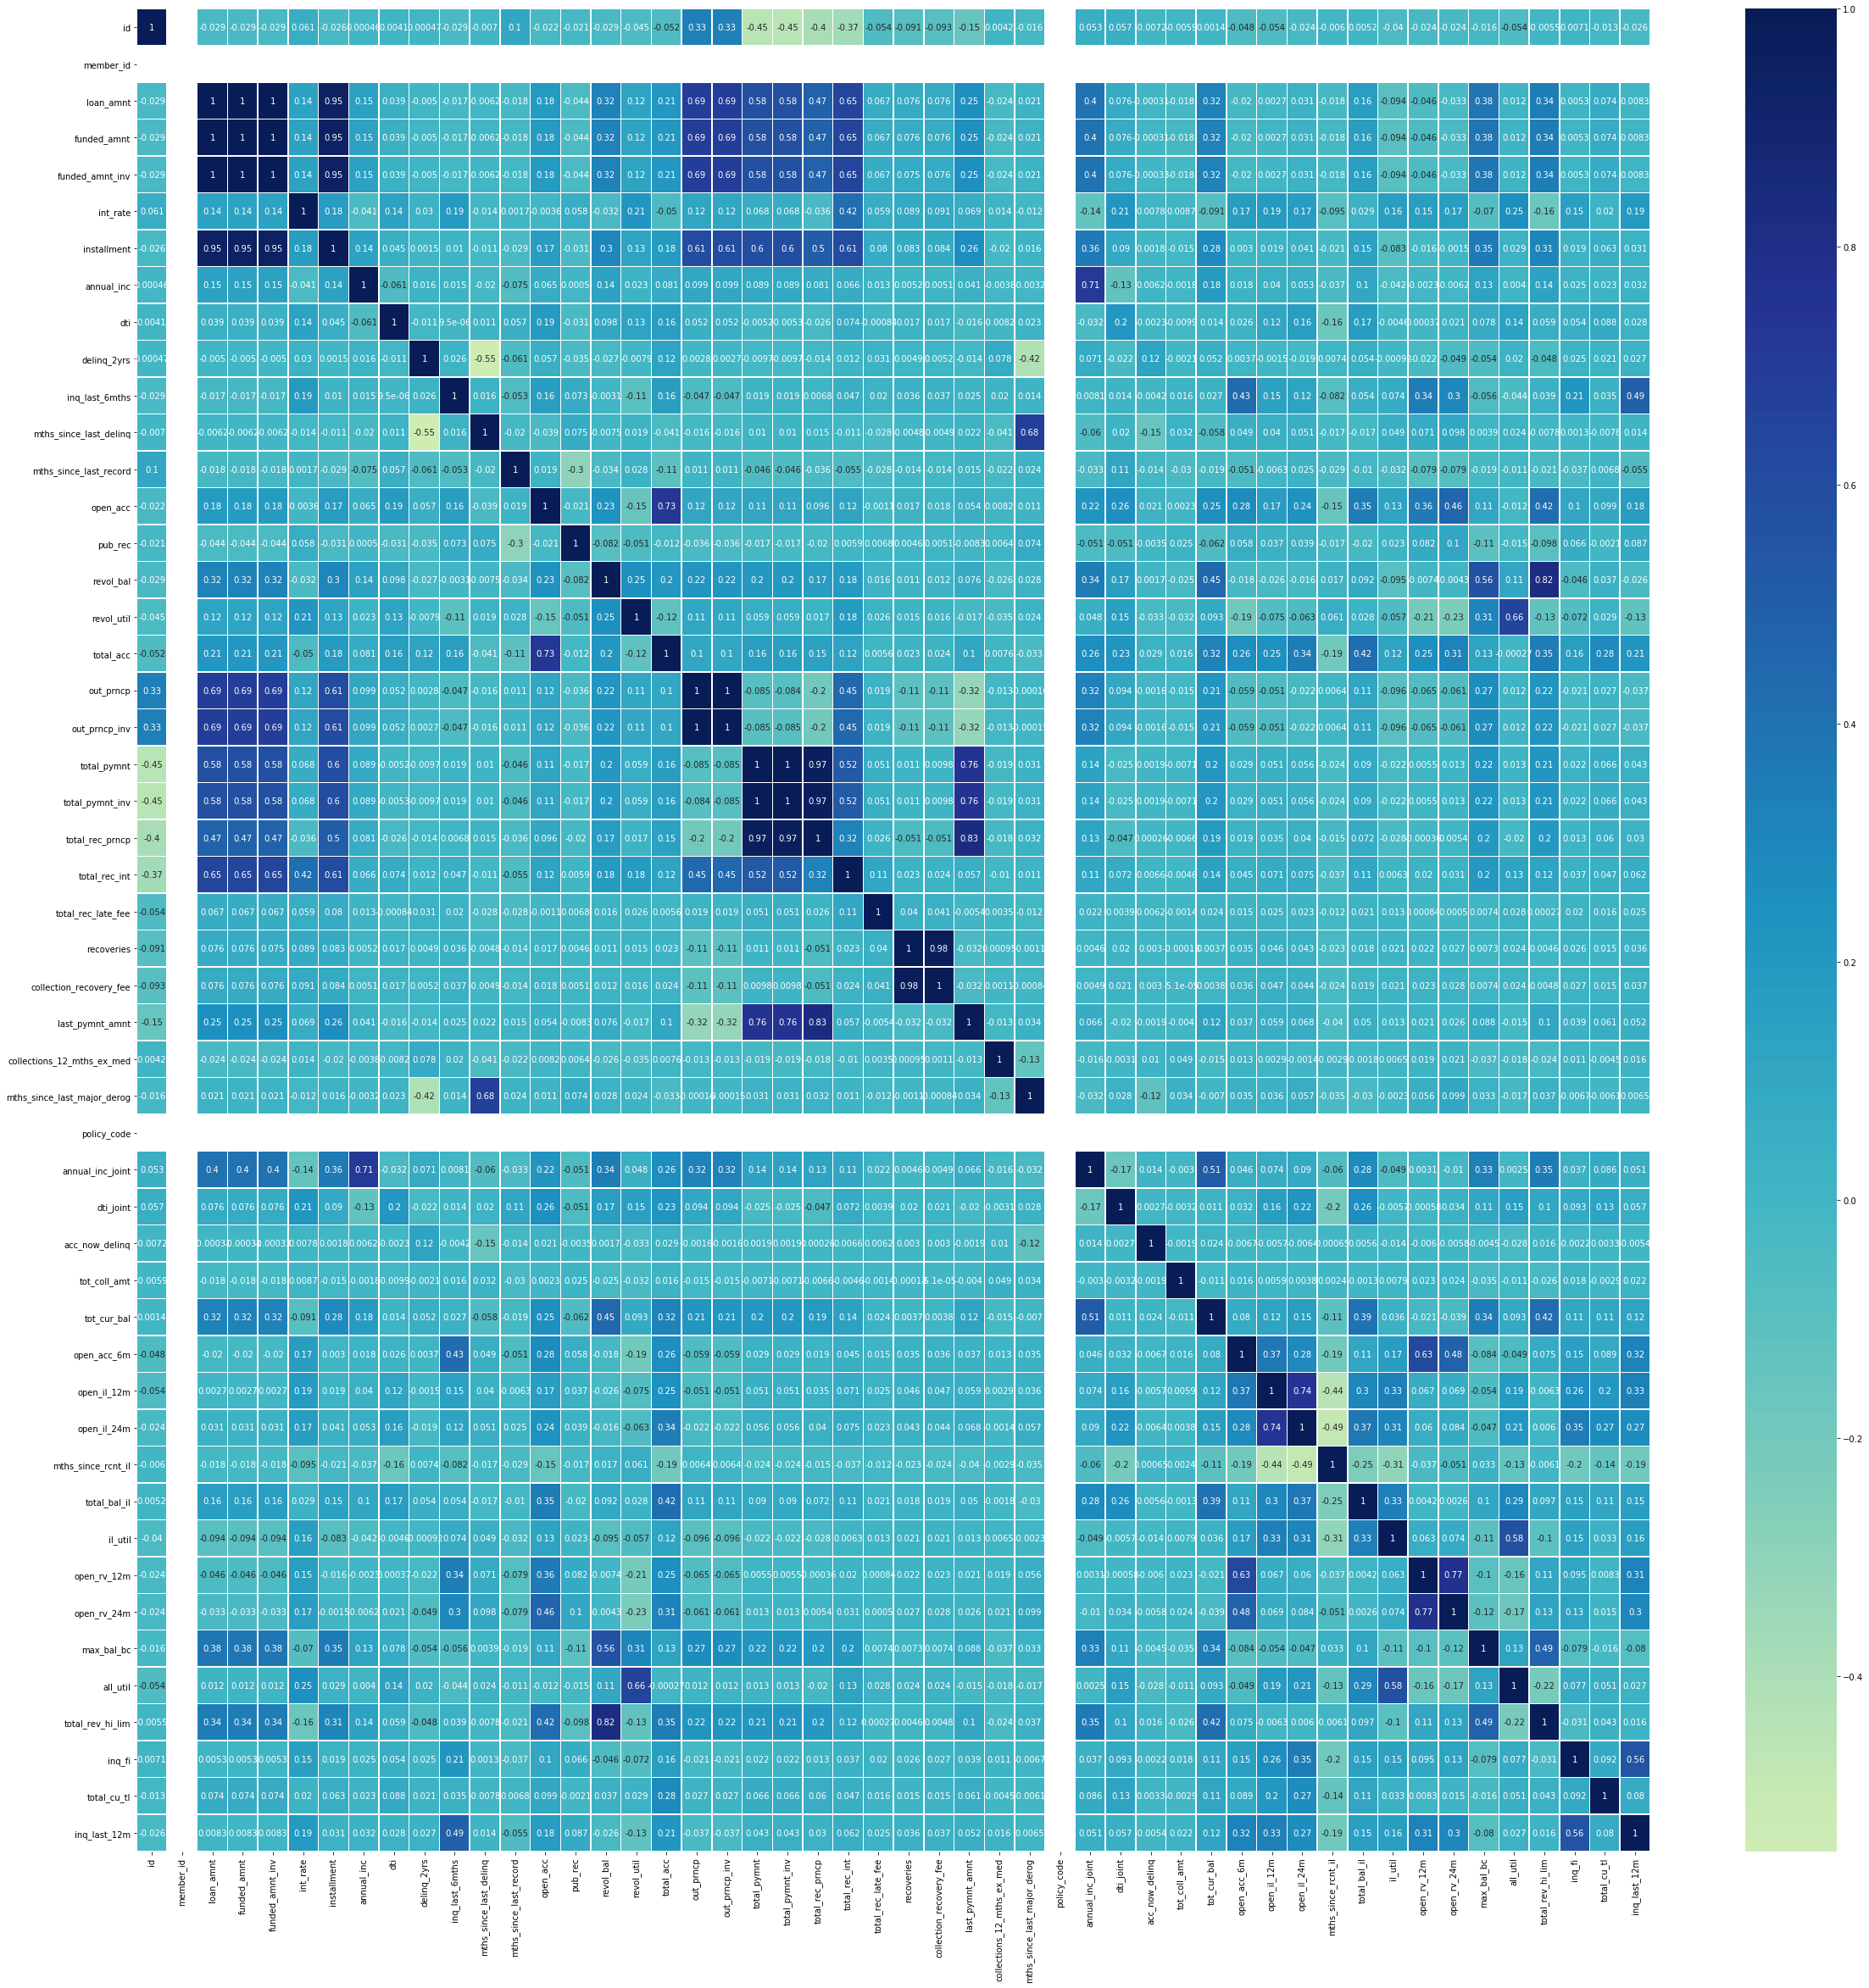

In [90]:
plt.figure(figsize=(40,40))
sns.heatmap(loan_data.corr(),
           annot=True,
           linewidth=.5,
           center=0,
           cmap="YlGnBu")
plt.show()

We have plotted the correlation matrix to identify any correlations within the data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

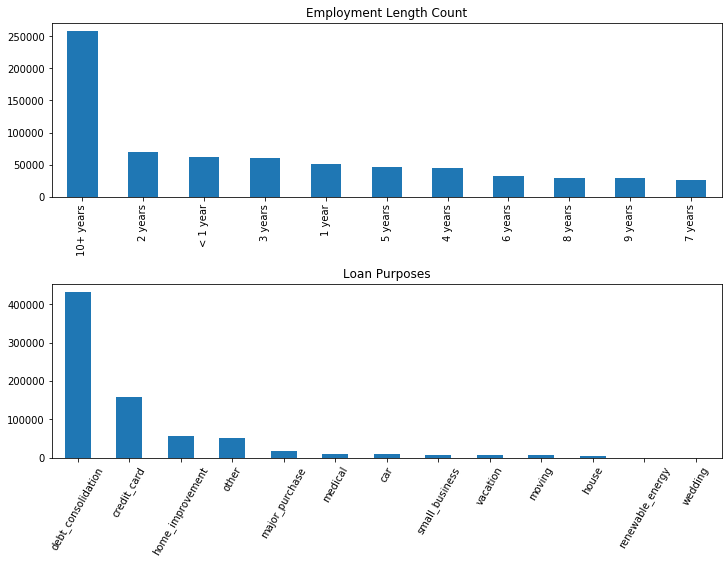

In [91]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plt.subplots_adjust(wspace=1.0, hspace=0.50)
loan_data.emp_length.value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Employment Length Count")
loan_data.purpose.value_counts().plot(kind="bar", ax=ax[1])
ax[1].set_title("Loan Purposes")
plt.xticks(rotation=60)

No handles with labels found to put in legend.


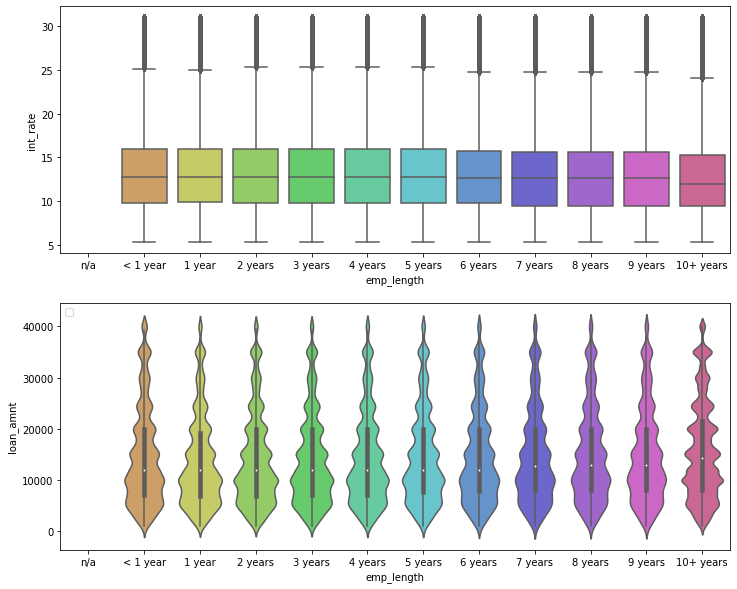

In [92]:
fig, ax = plt.subplots(2,1, figsize=(12,10))
g = sns.boxplot(x="emp_length", y="int_rate", data=loan_data,
              palette="hls",ax=ax[0],
               order=["n/a",'< 1 year','1 year','2 years','3 years','4 years', '5 years',
                      '6 years', '7 years', '8 years','9 years','10+ years'])

z = sns.violinplot(x="emp_length", y="loan_amnt",data=loan_data, 
               palette="hls", ax=ax[1],
               order=["n/a",'< 1 year','1 year','2 years','3 years','4 years', '5 years',
                      '6 years', '7 years', '8 years','9 years','10+ years'])
               
plt.legend(loc='upper left')
plt.show()

## Data Preprocessing

In [93]:
print(loan_data['emp_length'].unique())
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

[nan '10+ years' '7 years' '6 years' '2 years' '8 years' '3 years'
 '< 1 year' '1 year' '9 years' '5 years' '4 years']


In [94]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], infer_datetime_format=True)
loan_data['mths_since_earliest_cr_line']=round((pd.to_datetime('2017-12-01')-loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M'))
loan_data['mths_since_earliest_cr_line'].describe()

count    759338.000000
mean        212.522555
std          93.044828
min          40.000000
25%         149.000000
50%         194.000000
75%         260.000000
max        1017.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [95]:
print(loan_data['term'].unique()) 
loan_data['term_int'] = loan_data['term'].str.replace(' months','')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

['36 months' '60 months']


In [96]:
type(loan_data['issue_d'].unique())
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], infer_datetime_format=True)
loan_data['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01')-loan_data['issue_d_date'])/np.timedelta64(1,'M'))

Here we handle categorical variables:

In [97]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix='grade', prefix_sep=':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix='sub_grade', prefix_sep=':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                     pd.get_dummies(loan_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                     pd.get_dummies(loan_data['loan_status'], prefix='loan_status', prefix_sep=':'),
                     pd.get_dummies(loan_data['purpose'], prefix='purpose', prefix_sep=':'),
                     pd.get_dummies(loan_data['addr_state'], prefix='addr_state', prefix_sep=':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
                     ]
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)

Here we are handling null values:

In [98]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean, inplace = True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)

## Credit Risk Model

Here we will predict expected loss, calculated as:
Expected Loss(EL) = Prob. of Default(PD) x Loss Given Default(LGD) x Exposure At Default (EAD)

We maintain loans which have defaulted as Bad and those that have not defaulted as Good

## Probability of Default (PD Analysis)

Calculated through logistic regression

In [99]:
loan_data['loan_status'].value_counts()

Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: loan_status, dtype: int64

In [100]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)']),0,1)

In [105]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size=0.2, random_state =42)

In [106]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(607470, 200)
(151868, 200)
(607470,)
(151868,)


In [111]:
#Creating weight of evidence function which can be called for each discrete feature
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df=pd.concat([df[discrete_variable_name], good_bad_variable_df],axis=1)
    df=pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
                 ],axis=1)
    df=df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good'] #renaming columns to number of observations, proportion which did not default
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']*df['n_obs'] #identifying number of good credits (did not default)
    df['n_bad'] = (1-df['prop_good'])*df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad']) #WoE = ln(proportion good/proportion bad)
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True) #Sort by weight of evidence and reset the index
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    #Calculating Information Value:
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [122]:
#Creating weight of evidence function which can be called for continuous features
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df=pd.concat([df[discrete_variable_name], good_bad_variable_df],axis=1)
    df=pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
                 ],axis=1)
    df=df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good'] #renaming columns to number of observations, proportion which did not default
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']*df['n_obs'] #identifying number of good credits (did not default)
    df['n_bad'] = (1-df['prop_good'])*df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad']) #WoE = ln(proportion good/proportion bad)
    
    #We want to preserve natural order, not sort it by WoE
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop=True) #Sort by weight of evidence and reset the index
    
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    #Calculating Information Value:
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [117]:
def plot_by_woe(df_woe, rotation_of_x_axis_labels = 0):
    x=np.array(df_woe.iloc[:,0].apply(str))
    y=df_woe['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence: ')+df_woe.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)

## Creating Dummy Variables

Here we test the above written functions for a discrete variable "Grade" which signifies the loan grade

  grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     F   11463   0.764460    0.018870    8763.0   2700.0     0.015502   
1     G    4393   0.781926    0.007232    3435.0    958.0     0.006076   
2     E   33120   0.827868    0.054521   27419.0   5701.0     0.048504   
3     D   78529   0.881611    0.129272   69232.0   9297.0     0.122471   
4     C  195822   0.929661    0.322357  182048.0  13774.0     0.322041   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.064019 -1.418234             NaN       NaN  0.477284  
1    0.022715 -1.318596        0.017466  0.099638  0.477284  
2    0.135175 -1.024925        0.045943  0.293670  0.477284  
3    0.220439 -0.587749        0.053742  0.437177  0.477284  
4    0.326592 -0.014032        0.048050  0.573716  0.477284  


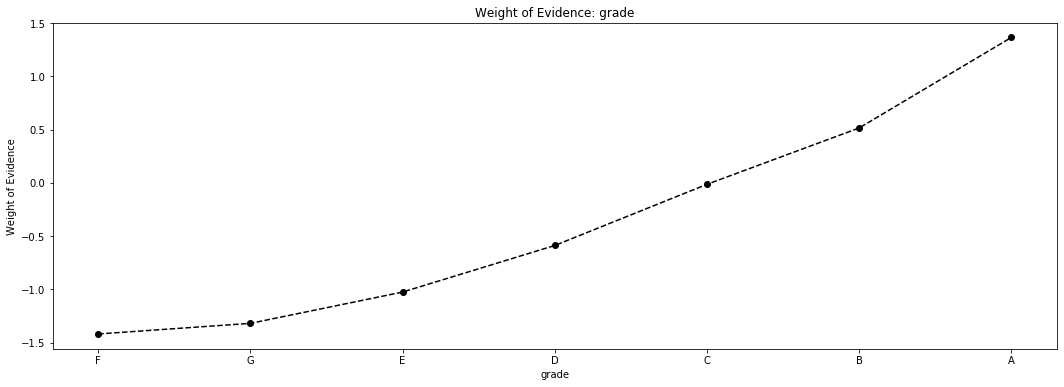

In [120]:
df_temp = woe_discrete(X_train,'grade',y_train)
print(df_temp.head())
plot_by_woe(df_temp)

From the above graph we can observe that Grade G loans are performing slightly better than Grade F loans. Others are as expected. 

***

  home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           RENT  237814   0.917473    0.391483  218188.0  19626.0   
1            OWN   72128   0.927767    0.118735   66918.0   5210.0   
2       MORTGAGE  297121   0.941704    0.489112  279800.0  17321.0   
3            ANY     404   0.955446    0.000665     386.0     18.0   
4           NONE       3   1.000000    0.000005       3.0      0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.385972    0.465347 -0.187018             NaN       NaN  inf  
1     0.118377    0.123533 -0.042632        0.010294  0.144386  inf  
2     0.494963    0.410694  0.186635        0.013937  0.229267  inf  
3     0.000683    0.000427  0.469946        0.013742  0.283310  inf  
4     0.000005    0.000000       inf        0.044554       inf  inf  


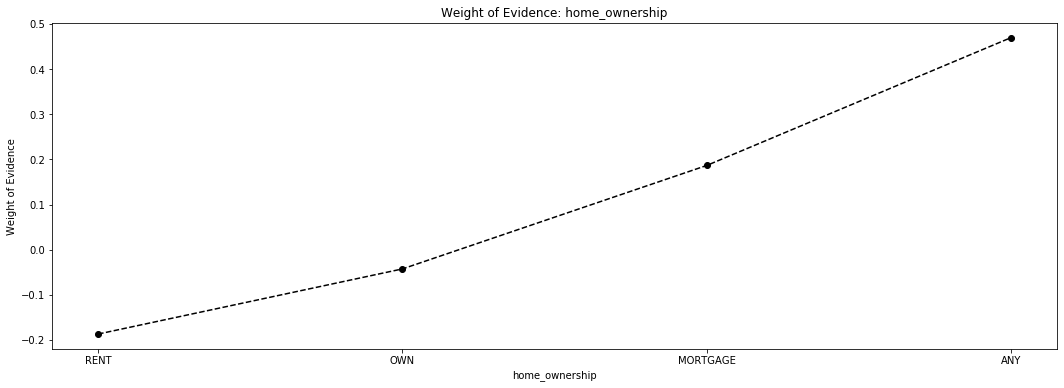

In [123]:
df_temp = woe_discrete(X_train,'home_ownership',y_train)
print(df_temp.head())
plot_by_woe(df_temp)

In [124]:
#we will create new column to club riskiest 'RENT' with 'NONE' - only 3 observations
X_train['home_ownership:RENT_NONE'] = sum([X_train['home_ownership:RENT']],X_train['home_ownership:NONE'])

***

In [125]:
X_train['addr_state'].unique()

array(['IN', 'FL', 'MO', 'NV', 'MD', 'NJ', 'MI', 'OH', 'CA', 'VA', 'NM',
       'TX', 'AL', 'AR', 'KY', 'NY', 'TN', 'GA', 'IL', 'SD', 'LA', 'RI',
       'MN', 'AZ', 'WA', 'MA', 'WI', 'NC', 'HI', 'KS', 'MS', 'ND', 'VT',
       'PA', 'NH', 'OR', 'UT', 'ME', 'CO', 'OK', 'SC', 'WV', 'WY', 'CT',
       'NE', 'DE', 'ID', 'DC', 'AK', 'MT'], dtype=object)

   addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          WV    622   0.890675    0.001024    554.0    68.0     0.000980   
1          OK   5561   0.914044    0.009154   5083.0   478.0     0.008992   
2          NV   8745   0.917667    0.014396   8025.0   720.0     0.014196   
3          AL   7304   0.917853    0.012024   6704.0   600.0     0.011859   
4          LA   6881   0.919488    0.011327   6327.0   554.0     0.011192   
5          NM   3057   0.922473    0.005032   2820.0   237.0     0.004989   
6          AR   4588   0.923278    0.007553   4236.0   352.0     0.007493   
7          NY  50319   0.923786    0.082834  46484.0  3835.0     0.082230   
8          FL  43826   0.923790    0.072145  40486.0  3340.0     0.071619   
9          CA  81120   0.925345    0.133537  75064.0  6056.0     0.132787   
10         NE   2989   0.925393    0.004920   2766.0   223.0     0.004893   
11         NC  17153   0.926252    0.028237  15888.0  1265.0     0.028106   

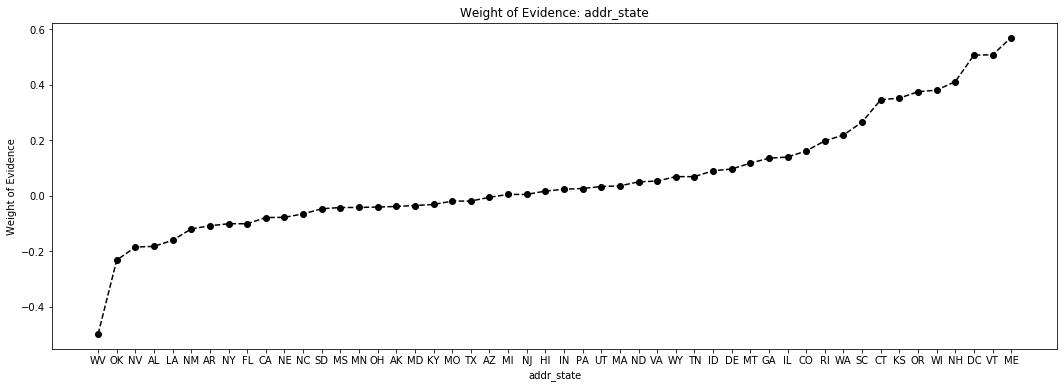

In [158]:
df_temp = woe_discrete(X_train,'addr_state',y_train)
print(df_temp)
plot_by_woe(df_temp)

From the above graph we get a state-wise representation of most defaults (West Virgina, Oklahoma, etc..)
We also notice that TX, NY, CA have highest number of borrowers

In [159]:
#Adding missing state North Dakota (ND)
if ['addr_state:ND'] in X_train.columns.values:
    pass
else:
    X_train['addr_state:ND']=0

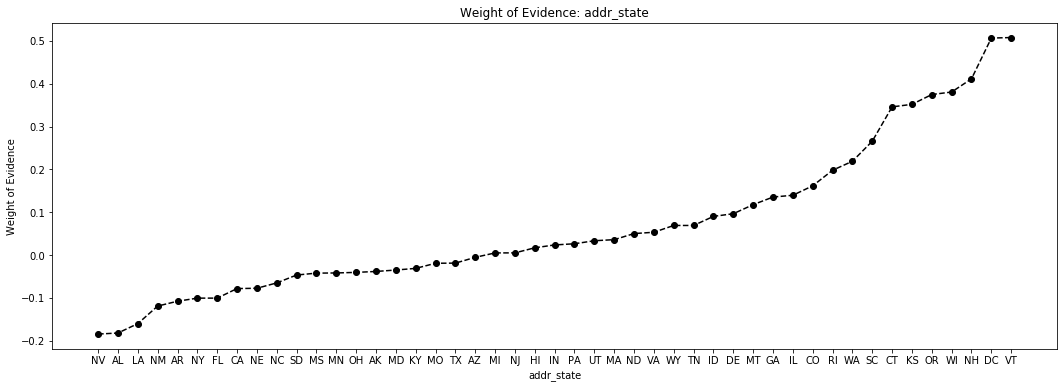

In [160]:
#We need to analyze the states which are not in the extremes
plot_by_woe(df_temp.iloc[2:-1,:])

We may group states together which are have similar WoE breaking at those states with large number of observers, but we are skipping it here as a lot of states have large number of observers.

***

In [132]:
X_train['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

  verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  169477   0.904854    0.278988  153352.0  16125.0   
1     Source Verified  238740   0.929702    0.393007  221957.0  16783.0   
2        Not Verified  199253   0.953491    0.328005  189986.0   9267.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.271278    0.382336 -0.343155             NaN       NaN  0.087629  
1     0.392639    0.397937 -0.013403        0.024847  0.329752  0.087629  
2     0.336083    0.219727  0.424971        0.023790  0.438373  0.087629  


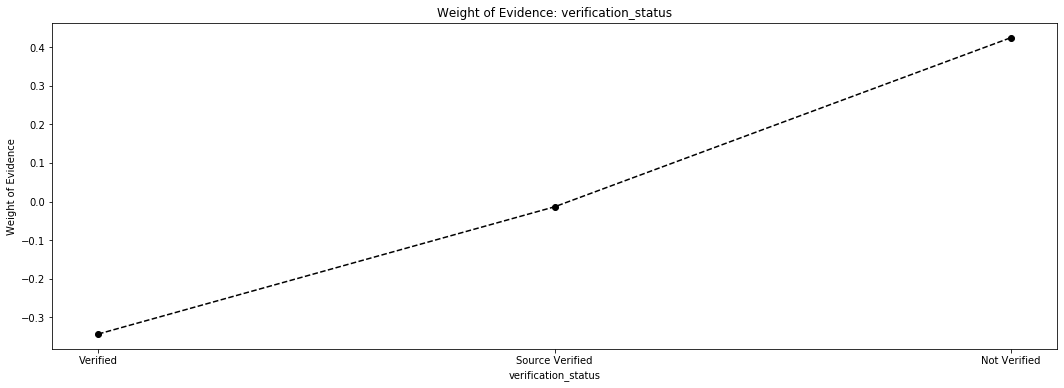

In [133]:
df_temp = woe_discrete(X_train,'verification_status',y_train)
print(df_temp)
plot_by_woe(df_temp)

***

In [134]:
X_train['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'house', 'home_improvement',
       'other', 'medical', 'small_business', 'moving', 'vacation',
       'major_purchase', 'car', 'renewable_energy', 'wedding'],
      dtype=object)

               purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0       small_business    6591   0.893795    0.010850    5891.0    700.0   
1     renewable_energy     408   0.901961    0.000672     368.0     40.0   
2               moving    4677   0.908275    0.007699    4248.0    429.0   
3                house    2877   0.917623    0.004736    2640.0    237.0   
4              medical    8244   0.919820    0.013571    7583.0    661.0   
5   debt_consolidation  345146   0.926382    0.568170  319737.0  25409.0   
6                other   40551   0.927129    0.066754   37596.0   2955.0   
7       major_purchase   14734   0.930297    0.024255   13707.0   1027.0   
8             vacation    5072   0.934543    0.008349    4740.0    332.0   
9     home_improvement   45865   0.940347    0.075502   43129.0   2736.0   
10         credit_card  126267   0.942115    0.207857  118958.0   7309.0   
11                 car    7036   0.951677    0.011582    6696.0    340.0   
12          

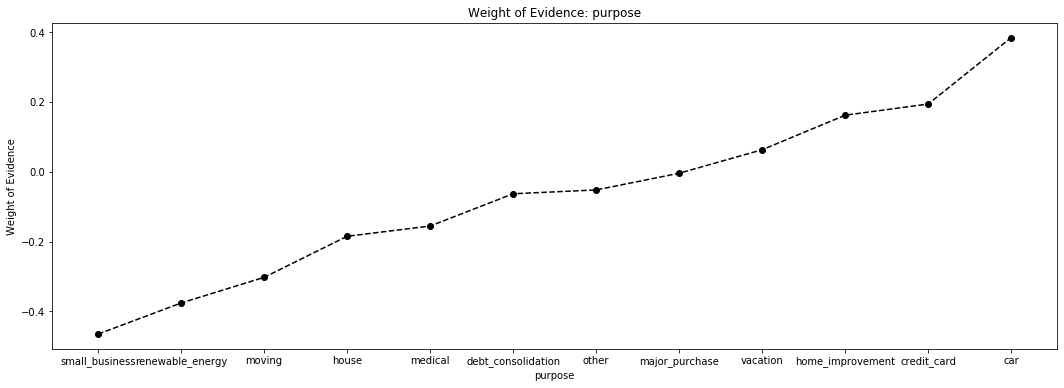

In [135]:
df_temp = woe_discrete(X_train,'purpose',y_train)
print(df_temp)
plot_by_woe(df_temp)

Loans which are given for "small_businesses" are most likely to default. We can group "wedding" with "small_businesses" as there are too few observations for "wedding"

In [137]:
X_train['purpose:SB_WEDDING'] = sum([X_train['purpose:small_business']],X_train['purpose:wedding'])

***

In [138]:
X_train['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

  initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  142990   0.916344    0.235386  131028.0  11962.0   
1                   w  464480   0.934953    0.764614  434267.0  30213.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.231787    0.283628 -0.201844             NaN       NaN  0.014086  
1     0.768213    0.716372  0.069867        0.018609  0.271711  0.014086  


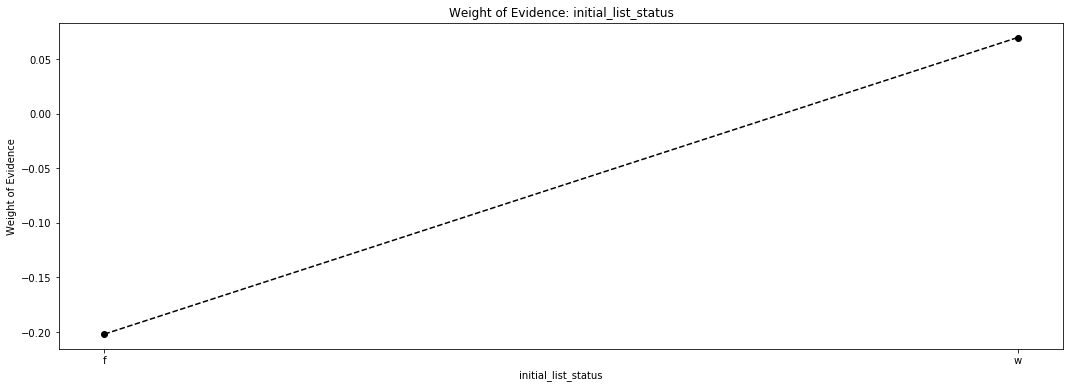

In [139]:
df_temp = woe_discrete(X_train,'initial_list_status',y_train)
print(df_temp)
plot_by_woe(df_temp)

***

In [140]:
X_train['term_int'].unique()

array([60, 36])

   term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  449330   0.935971    0.739674  420560.0  28770.0     0.743966   
1        60  158140   0.915233    0.260326  144735.0  13405.0     0.256034   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.682158  0.086734             NaN       NaN  0.018726  
1    0.317842 -0.216243        0.020738  0.302977  0.018726  


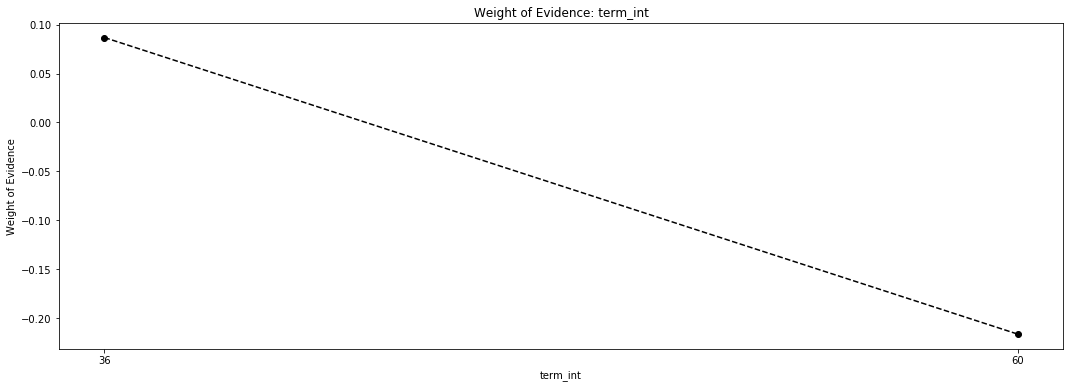

In [142]:
df_temp = woe_ordered_continuous(X_train,'term_int',y_train)
print(df_temp)
plot_by_woe(df_temp)

In [145]:
X_train['term:36'] = np.where((X_train['term_int']==36),1,0)
X_train['term:60'] = np.where((X_train['term_int']==60),1,0)

***

In [146]:
X_train['emp_length_int'].unique()

array([ 4.,  0., 10.,  3.,  1.,  6.,  8.,  7.,  9.,  2.,  5.])

    emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0   90681   0.922420    0.149277   83646.0   7035.0   
1              1.0   40524   0.925600    0.066709   37509.0   3015.0   
2              2.0   55739   0.928058    0.091756   51729.0   4010.0   
3              3.0   48584   0.926745    0.079978   45025.0   3559.0   
4              4.0   36458   0.932745    0.060016   34006.0   2452.0   
5              5.0   36949   0.928848    0.060824   34320.0   2629.0   
6              6.0   26061   0.933502    0.042901   24328.0   1733.0   
7              7.0   20561   0.932591    0.033847   19175.0   1386.0   
8              8.0   23002   0.923789    0.037865   21249.0   1753.0   
9              9.0   22845   0.932020    0.037607   21292.0   1553.0   
10            10.0  206066   0.936671    0.339220  193016.0  13050.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.147969    0.166805 -0.119824             NaN      

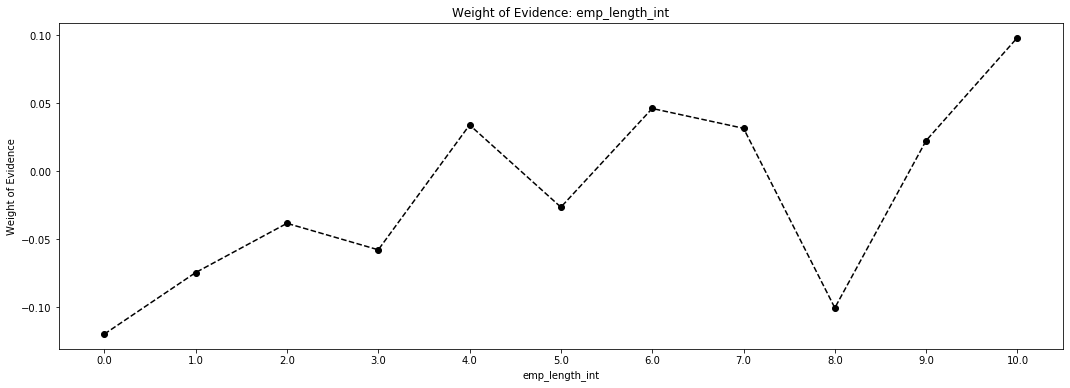

In [147]:
df_temp = woe_ordered_continuous(X_train,'emp_length_int',y_train)
print(df_temp)
plot_by_woe(df_temp)

In [150]:
X_train['emp_length:0'] = np.where(X_train['emp_length_int'].isin([0]),1,0)
X_train['emp_length:1-3'] = np.where(X_train['emp_length_int'].isin(range(1,4)),1,0)
X_train['emp_length:4'] = np.where(X_train['emp_length_int'].isin([4]),1,0)
X_train['emp_length:5'] = np.where(X_train['emp_length_int'].isin([5]),1,0)
X_train['emp_length:6-7'] = np.where(X_train['emp_length_int'].isin(range(6,8)),1,0)
X_train['emp_length:8'] = np.where(X_train['emp_length_int'].isin([8]),1,0)
X_train['emp_length:9'] = np.where(X_train['emp_length_int'].isin([9]),1,0)
X_train['emp_length:10'] = np.where(X_train['emp_length_int'].isin([10]),1,0)

***


In [151]:
X_train['mths_since_issue_d'].unique()

array([13., 23., 19.,  7., 17., 21., 11., 15., 10.,  5.,  3., 18., 16.,
        6.,  4., 20., 12.,  8., 22., 14.,  9.])

In [152]:
X_train['int_rate'].unique()

array([25.49, 14.85, 14.46, 14.99, 12.74, 11.49, 11.99,  7.49, 13.49,
        8.39, 11.39,  7.07, 18.06, 10.91, 15.05,  5.32, 13.59, 11.47,
       18.99, 22.39,  7.97, 16.02, 25.82,  6.49,  8.24, 10.49,  8.59,
        9.75, 17.99, 12.79,  7.39, 15.99,  7.99, 12.62, 28.14, 10.99,
        6.99,  9.44, 10.75, 20.99, 19.99, 20.  , 13.44, 15.59, 13.67,
       10.42, 21.45, 26.24,  7.21, 22.45, 13.99,  9.93,  6.97,  8.99,
        9.16, 17.97, 27.99,  7.59, 24.11, 17.27, 15.31, 28.72, 22.74,
       24.99,  9.49, 14.08, 16.99, 19.48, 25.29, 14.49, 10.78, 11.44,
        7.89, 15.77, 22.91,  8.49, 27.49, 12.99,  7.24, 30.84, 29.96,
        9.17, 23.99, 26.3 , 27.34, 16.29,  9.8 , 28.69, 24.74, 18.25,
       18.49, 29.67, 23.13, 17.09, 19.03, 29.49,  7.35, 11.48, 21.97,
       21.48, 21.49, 30.79, 19.53, 21.18, 23.88, 27.79, 20.75, 25.88,
       12.88,  7.91, 30.99, 14.48, 30.65, 26.57, 24.85, 29.99, 16.59,
       24.49, 25.69, 30.75, 30.94, 28.18, 24.24, 20.5 , 30.74, 19.89,
       29.69, 25.11,

     int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (5.294, 5.833]  25046   0.990018    0.041230  24796.0   250.0   
1     (5.833, 6.347]    157   0.980892    0.000258    154.0     3.0   
2      (6.347, 6.86]   5169   0.966725    0.008509   4997.0   172.0   
3      (6.86, 7.374]  28122   0.987768    0.046294  27778.0   344.0   
4     (7.374, 7.887]  14582   0.971197    0.024004  14162.0   420.0   
5       (7.887, 8.4]  42975   0.970681    0.070744  41715.0  1260.0   
6       (8.4, 8.914]   4675   0.958503    0.007696   4481.0   194.0   
7     (8.914, 9.427]  15677   0.940869    0.025807  14750.0   927.0   
8     (9.427, 9.941]  34023   0.965406    0.056008  32846.0  1177.0   
9    (9.941, 10.454]   9164   0.993125    0.015086   9101.0    63.0   
10  (10.454, 10.967]  33555   0.952883    0.055237  31974.0  1581.0   
11  (10.967, 11.481]  38525   0.944659    0.063419  36393.0  2132.0   
12  (11.481, 11.994]  44342   0.943101    0.072995  41819.0  2523.0   
13  (1

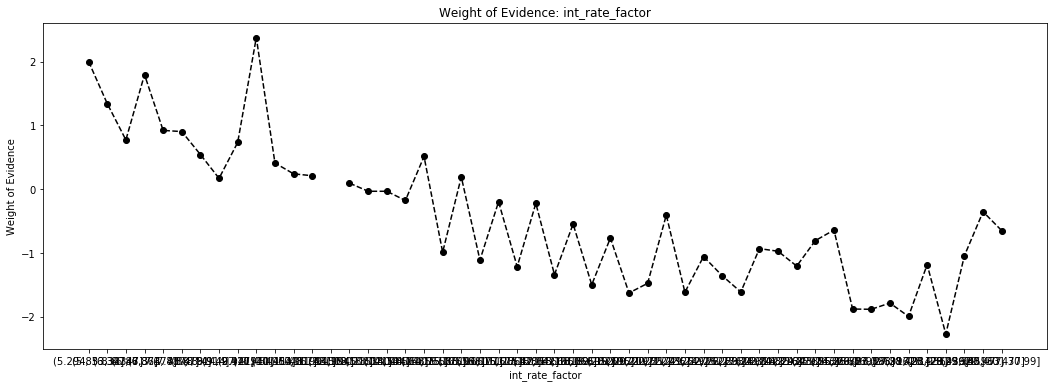

In [154]:
X_train['int_rate_factor'] = pd.cut(X_train['int_rate'],50)
df_temp = woe_ordered_continuous(X_train,'int_rate_factor',y_train)
print(df_temp)
plot_by_woe(df_temp)

General trend shows, greater the rate of interest rate - lower the weight of evidence (higher chance of defaulting)

## Logistic Regression

In [161]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
        
    def fit(self,X,y):
        self.model.fit(X,y)
        denom=(2.0*(1.0 + np.cosh(self.model.decision_function(X))))
        denom=np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        Cramer_Rao=np.linalg.inv(F_ij)
        sigma_estimates=np.sqrt(np.diagonal(Cramer_Rao))
        z_scores=self.model.coef_[0]/sigma_estimates
        p_values=[stat.norm.sf(abs(X)) *2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values
        

## LGD

## EAD